In [1]:
from IPython.display import Image, display
from math import sqrt

# Exo 3

#### Question 1 :

A quadrilateral (a b c d) is inscribed
into the circle of radius r. Its area A is an integer.

We only seek for integer solutions (a b c d A)
- Find all integer solutions (a b c d A) with : 0<a⩽c<d<11.
You must check at least 1 or 2 solutions

- Find a solution such that 0<a≠b≠c≠d

**Answer :**

To find an inscriptible quadrilateral, I use Brahmagupta's formula.

In [2]:
def quadri_inscribable_area(a, b, c, d):
    """Vérifie si un quadrilatère de côtés a,b,c,d est inscriptible dans un cercle
    Si oui : retourne son aire."""

    # Brahmagupta's formula condition
    s = (a + b + c + d) / 2
    x = (s-a)*(s-b)*(s-c)*(s-d)
    if x < 0:
        return False
    
    return sqrt(x)

In [3]:
def trouver_quadri_inscrits() :
    """Find all integer quadrilaterals (a, b, c, d)
    with integer area and 0 < a <= c < d < 11 that are inscribable in a circle."""
    solutions = []
    for a in range(1, 10):
        for c in range(a, 10):
            for d in range(c+1, 11):
                for b in range(c, 11):
                    area = quadri_inscribable_area(a, b, c, d)
                    if area and area.is_integer():
                        solutions.append((a, b, c, d, int(area)))
    return solutions

In [4]:
sols = trouver_quadri_inscrits()

print(f"There are {len(sols)} inscribable quadrilaterals.\n")

print("Solutions with different sides :")
for (a, b, c, d, area) in sols:
    if a!=b and b!=c and c!=d and a!=c and a!=d and b!=d:
        print(f"(a,b,c,d) = {(a,b,c,d)} of area {area}")

There are 61 inscribable quadrilaterals.

Solutions with different sides :
(a,b,c,d) = (1, 9, 2, 8) of area 12
(a,b,c,d) = (1, 8, 2, 9) of area 12
(a,b,c,d) = (1, 8, 3, 6) of area 12
(a,b,c,d) = (1, 6, 3, 8) of area 12
(a,b,c,d) = (1, 8, 4, 7) of area 18
(a,b,c,d) = (1, 7, 4, 8) of area 18
(a,b,c,d) = (2, 9, 6, 7) of area 30
(a,b,c,d) = (2, 7, 6, 9) of area 30
(a,b,c,d) = (4, 10, 5, 7) of area 36
(a,b,c,d) = (4, 7, 5, 10) of area 36


In the following images :
- (a,b,c,d) = (1, 9, 2, 8) of area 12
- (a,b,c,d) = (1, 8, 3, 6) of area 12
- (a,b,c,d) = (1, 8, 4, 7) of area 18

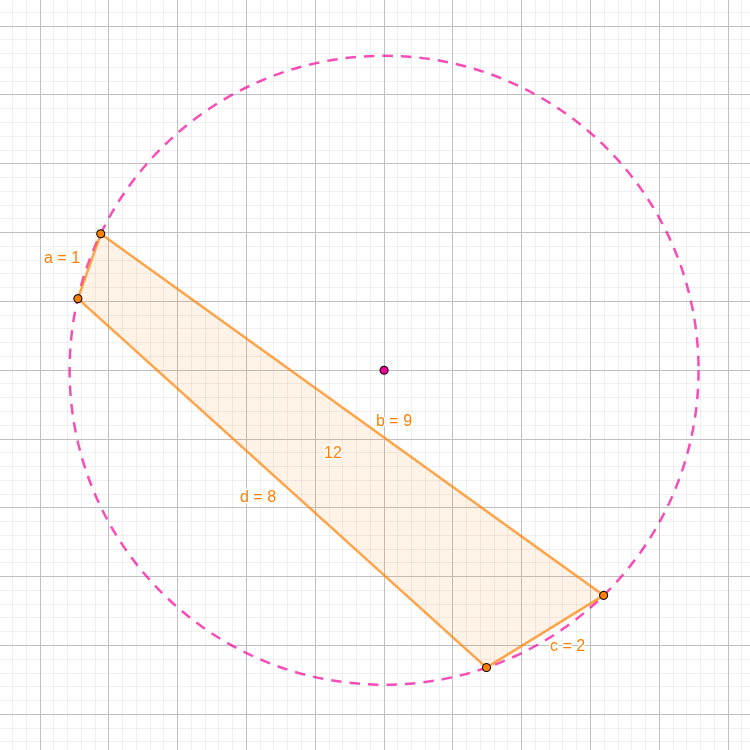

In [5]:
display(Image(filename="exo3-1-1.png", width=400, height=400))

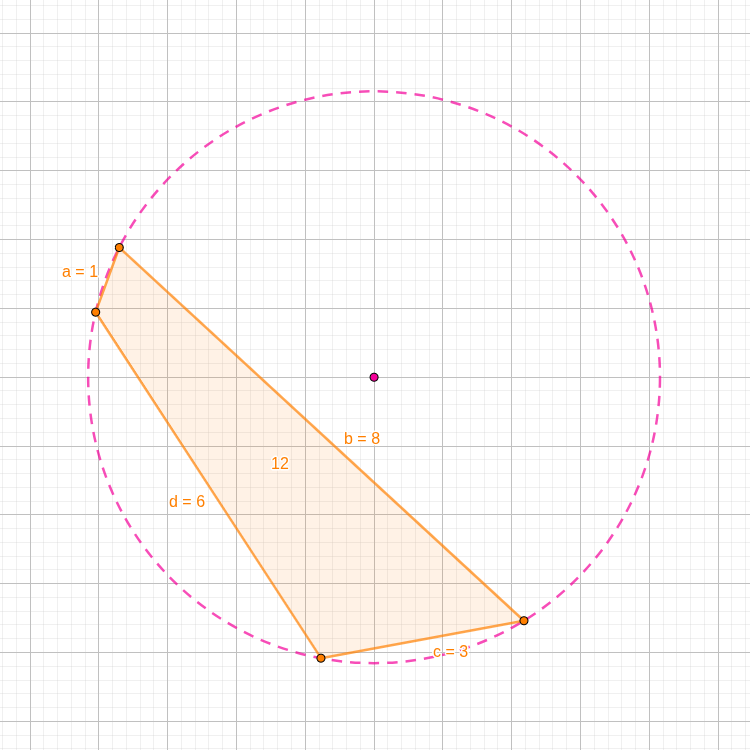

In [6]:
display(Image(filename="exo3-1-2.png", width=400, height=400))

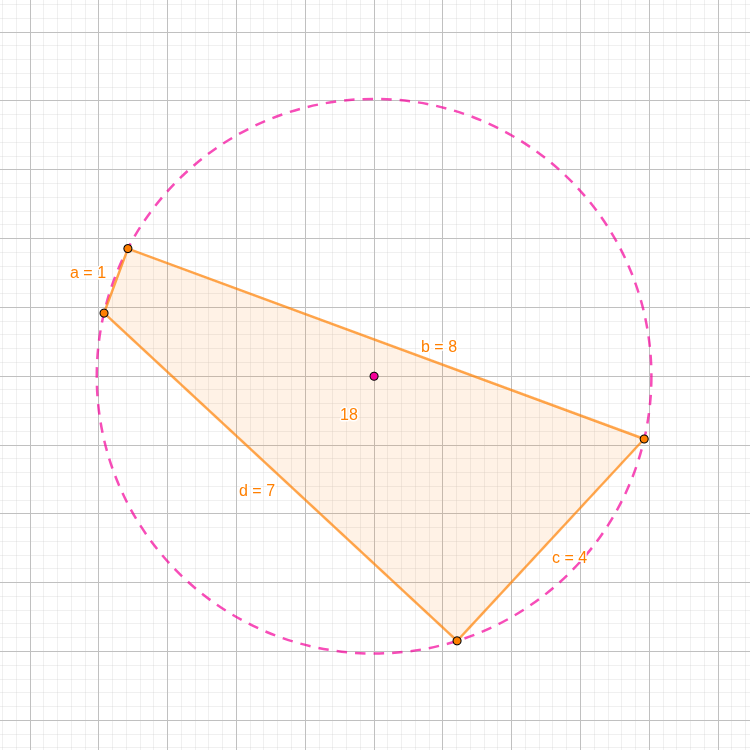

In [7]:
display(Image(filename="exo3-1-3.png", width=400, height=400))

#### Question 2 :
Find 3 different rectangle triangles (with all 9 sides different) and with
the same integer area

**Answer :**

To find such set of triangles, I sort each heronian right-triangle by their area, until I have enough triangles.

In [8]:
def triangle(a, b, epsilon=1e-10) :
    """Trouve le troisième côté et l'aire
    du triangle rectangle héronien s'il existe"""
    c = sqrt(a**2 + b**2)
    Aire = (a*b)/2
    if abs(c - round(c)) < epsilon and Aire.is_integer() :
        return int(Aire), int(c)
    return None, None

In [9]:
def trouver_triplet_triangles(maxi = 150) :
    """Trouve des ensembles de trois triangles rectangles héroniens différents"""

    # Tous les triangles rectangles de Héron, par aire
    # (avec les côtés de taille inférieure à un max)
    triangles = {}
    for a in range(1, maxi):
        for b in range(a, maxi):
            Aire, c = triangle(a, b)
            if Aire is not None:
                if triangles.get(Aire) is None :
                    triangles[Aire] = [(a, b, c)]
                else :
                    triangles[Aire].append((a, b, c))

    triangles = dict(sorted(triangles.items()))

    # Triplets de triangles qui ont la même aire
    triplets = []
    for Aire in triangles :
        if len(triangles[Aire]) == 3 :
            triplets.append((Aire, triangles[Aire]))

    return triplets, triangles

In [10]:
maxi = 400
triplets, triangles = trouver_triplet_triangles(maxi)

print(f"Nombre de triplets de triangles rectangles héroniens différents trouvés, pour des côtés < {maxi} :\n{len(triplets)}\n")

print("Quelques triplets :")
for (Aire, t) in triplets :
    print(f"Aire = {Aire:4d} :")
    for (a, b, c) in t :
        print(f"   {t.index((a, b, c)) + 1}) a={a:3d}, b={b:3d}, c={c:3d}")

Nombre de triplets de triangles rectangles héroniens différents trouvés, pour des côtés < 400 :
4

Quelques triplets :
Aire =  840 :
   1) a= 15, b=112, c=113
   2) a= 24, b= 70, c= 74
   3) a= 40, b= 42, c= 58
Aire = 3360 :
   1) a= 30, b=224, c=226
   2) a= 48, b=140, c=148
   3) a= 80, b= 84, c=116
Aire = 7560 :
   1) a= 45, b=336, c=339
   2) a= 72, b=210, c=222
   3) a=120, b=126, c=174
Aire = 10920 :
   1) a= 56, b=390, c=394
   2) a=105, b=208, c=233
   3) a=120, b=182, c=218


In the following image : the first set of heronian right-triangle found with an area of 840.

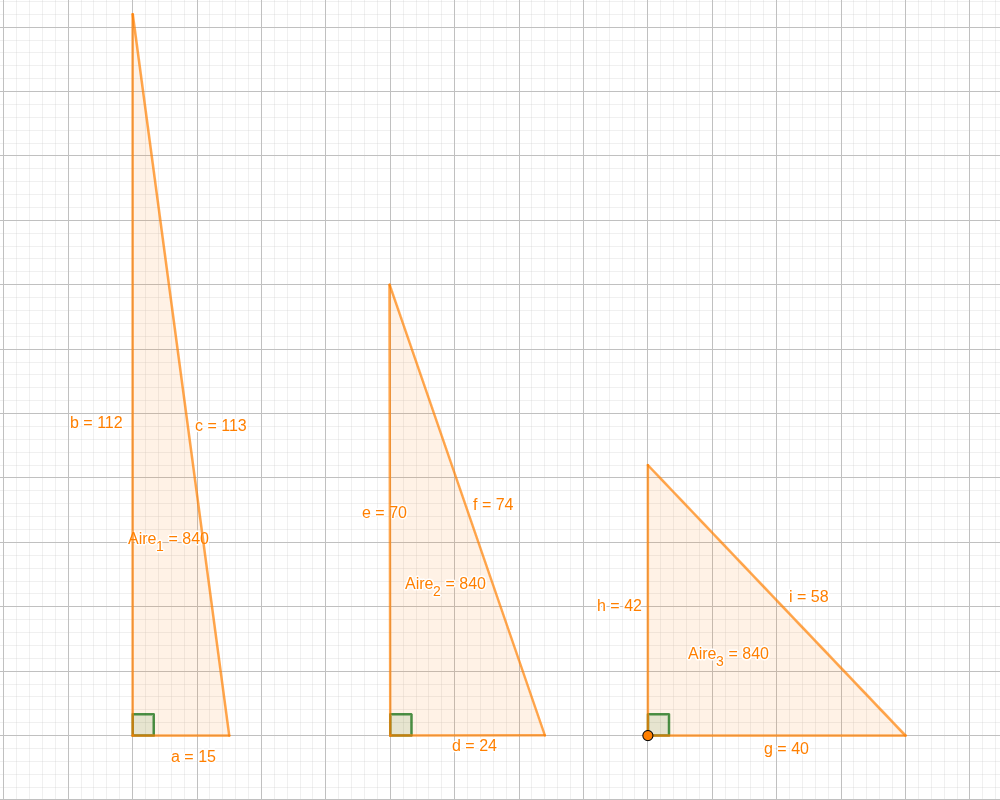

In [11]:
display(Image(filename="exo3-2.png", width=500, height=400))

#### Question 3 :
This quadrilateral has 4 integer sides
which are known (a, b, c, d) as well as a 90° angle.
- Find its area A.
- Find all Heronian quadrilaterals with a 90° angle
for : 0 < b,d ⩽ a,c < 15


**Answer :**

To find such quadrilateral, I enumerate quadrilaterals whose side lengths satisfy the tiangle inequalities (so each triple of sides can form a triangle) then I do the same conditions for the entire quadrilaterial. Then I compute the area taking into account the right angle.

In [12]:
def is_quadri(a,b,c,d) :
    """Vérifie si les côtés a,b,c,d peuvent former un quadrilatère"""

    # Vérif inégalités quadrilatère
    if not ( (a < b+c+d) and (b < a+c+d) and (c < a+b+d) and (d < a+b+c) ) :
        return False
    
    # Vérif inégalités triangulaire sur le triangle en face de l'angle droit
    h = sqrt(a**2 + d**2)
    if not ( (h < b+c) and (b < c + h) and (c < b + h) ) :
        return False
    
    # Vérif sur l'autre triangle
    if not ( (a < d+h) and (d < a + h) and (h < a + d) ) :
        return False

    return True

In [13]:
def quadri_area_right_angle(a,b,c,d) :
    """Aire du quadrilatère de côtés a,b,c,d avec un angle droit entre a et d"""

    # Triangle de côtés a, d :
    A1 = (a*d)/2
    h = sqrt(a**2 + d**2)

    # Triangle de côtés b, c :
    s = (b+c+h)/2
    if s*(s-b)*(s-c)*(s-h) < 0 :
        return None
    A2 = sqrt(s*(s-b)*(s-c)*(s-h))

    return A1 + A2

In [14]:
def trouver_quadri_heron() :
    """ Trouve tous les quadrilatères de Héron (a,b,c,d) avec
    0 < b,d ⩽ a,c < 15 et un angle droit entre a et d.
    Dans un soucis de manque de définition, je suppose ici qu'un quadrilatère de Héron
    est un quadrilatère dont tous les côtés sont entiers et dont l'aire est un entier.
    """
    sols = []
    for a in range(1, 15):                    # 0 < a < 15
        for d in range(1, a+1):               # 0 < d ⩽ a
            for b in range(1, a+1):           # 0 < b ⩽ a
                for c in range(max(b,d), 15): # b,d ⩽ c < 15
                    if is_quadri(a,b,c,d) and quadri_area_right_angle(a,b,c,d)!=None and quadri_area_right_angle(a,b,c,d).is_integer() :
                        sols.append((a,b,c,d))
    return sols



In [15]:
sols = trouver_quadri_heron()
print(f"Nombre de solutions : {len(sols)}")

print("Quelques solutions avec des quadrilatères qui ne sont pas des rectangles :")
for (a,b,c,d) in sols :
    if a!=c :
        print(f"a={a:2d}, b={b:2d}, c={c:2d}, d={d:2d} => aire = {quadri_area_right_angle(a,b,c,d)}")

Nombre de solutions : 113
Quelques solutions avec des quadrilatères qui ne sont pas des rectangles :
a= 4, b= 1, c= 5, d= 2 => aire = 6.0
a= 5, b= 5, c= 8, d= 4 => aire = 26.0
a= 5, b= 1, c= 7, d= 5 => aire = 16.0
a= 6, b= 5, c=10, d= 3 => aire = 24.0
a= 6, b= 3, c=10, d= 5 => aire = 24.0
a= 7, b= 5, c= 5, d= 1 => aire = 16.0
a= 7, b= 1, c= 8, d= 4 => aire = 18.0
a= 7, b= 4, c= 5, d= 4 => aire = 22.0
a= 7, b= 5, c=10, d= 4 => aire = 34.0
a= 7, b= 7, c=10, d= 4 => aire = 42.0
a= 7, b= 5, c=13, d= 5 => aire = 30.0
a= 7, b= 1, c=10, d= 6 => aire = 24.0
a= 7, b= 2, c= 9, d= 6 => aire = 30.0
a= 8, b= 4, c= 7, d= 1 => aire = 18.0
a= 8, b= 5, c=10, d= 1 => aire = 24.0
a= 8, b= 2, c=10, d= 4 => aire = 24.0
a= 8, b= 5, c= 5, d= 4 => aire = 26.0
a= 8, b= 5, c=11, d= 4 => aire = 38.0
a= 9, b= 6, c= 7, d= 2 => aire = 30.0
a= 9, b= 5, c= 5, d= 3 => aire = 21.0
a= 9, b= 5, c=13, d= 3 => aire = 33.0
a= 9, b= 5, c= 6, d= 4 => aire = 30.0
a= 9, b= 5, c=10, d= 4 => aire = 42.0
a= 9, b= 5, c=12, d= 4 => 

In the following image : one of the listed quadrilateral with integer sides (a,b,c,d)=(9,5,10,4) and integer area of 42.

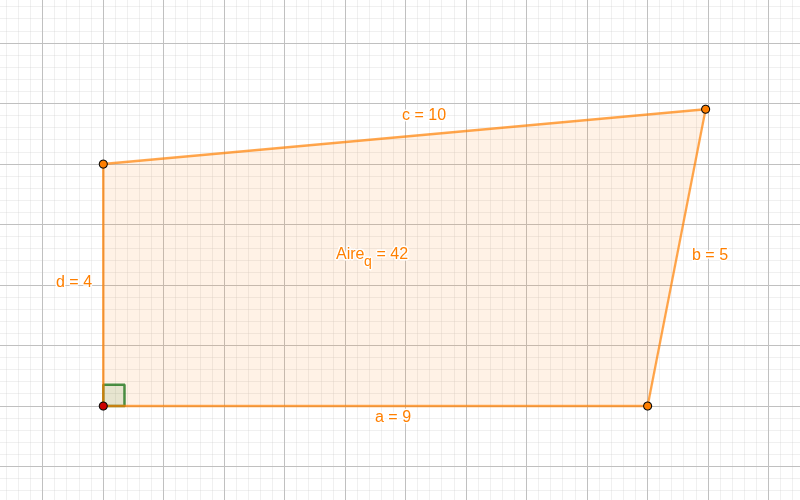

In [16]:
display(Image(filename="exo3-3.png", width=800, height=500))

#### Question 4 :
This rectangle is only composed
of squares. The orange one is a 2x2
square.
- Find the size of the rectangle


**Answer :**

It's a 15x15 square

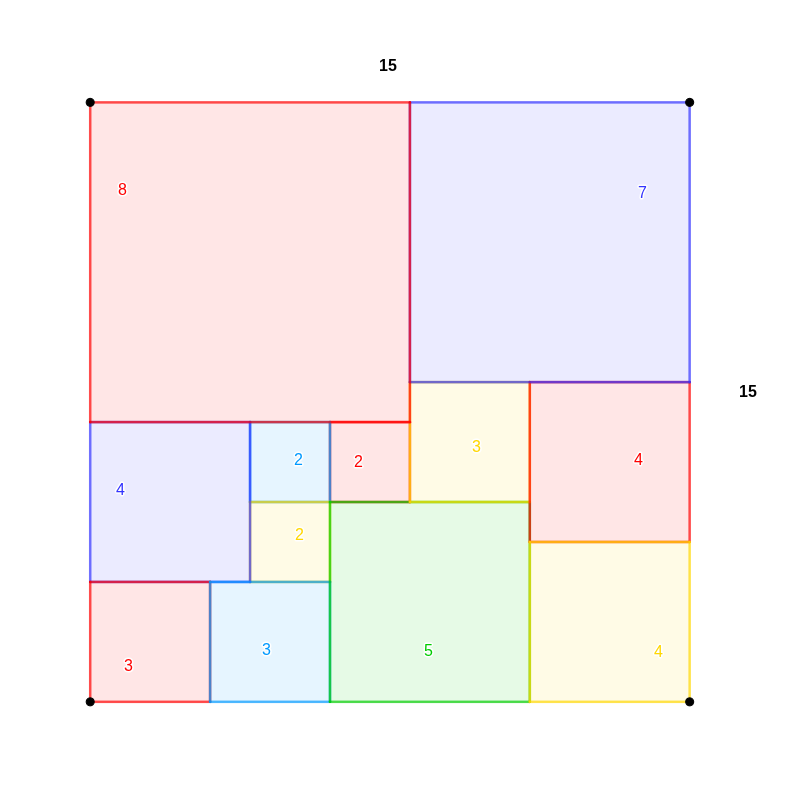

In [17]:
display(Image(filename="exo3-4.png", width=500, height=500))